# Lesson: Basic text prep with Python
by Alex Provo and Jay Brodeur for [ARL DSI 2021](https://jasonbrodeur.github.io/dsi-text-prep/)

In this notebook, we'll run through a few examples that introduce you to text exploration, manipulation, and transformation using Python. The purpose of these exercises is to familiarize you with basic concepts of preparing text in Python, and hopefully, encourage you to explore it a bit more. 
  
Throughout this notebook, we've tried to document as much as possible the operations that we're performing, and the motivations behind doing so. More than anything, we're trying to convey the exploratory and often iterative nature of developing scripts and functions to prepare text for further analysis.  
  
Towards the end, we'll demonstrate some of the interesting things you can do with Natural Language Processing (NLP) packages like [NLTK](https://www.nltk.org/) and [spaCy](https://spacy.io/). There are **many** more tools and resources to explore, and we've listed some of them in the [Learn More](https://jasonbrodeur.github.io/dsi-text-prep/learn-more.html) page of the workshop website. 

We hope you enjoy!

In this exercise, we will continue working with the article by Bernhard Berenson that was used in the [Open Refine](https://jasonbrodeur.github.io/dsi-text-prep/open-refine.html) exercises. 

**Citation:** Berenson, B. (1892). Some Comments on Correggio in Connection with His Pictures in Dresden. The Knight Errant, 1(3), 73-85. doi:10.2307/25515893
  
Depending on our overall objective with the text (e.g. advanced analysis, dissemination of "clean" text, our objectives may include: 
* Identify and remove or fix errors--ideally, using repeatable methods that can be used on this text and perhaps many others in the corpus
* Reduce the words in the text that have little value (very common 'stop words' like 'a', 'an, 'me', 'my', 'myself', 'we', 'our', 'ours', etc.) to improve the information content for analyses. 
* Perform the desired analyses and/or disseminate the "cleaned up" text. ("cleaned up" is placed within scare quotes here to acknowledge the subjectivity involved in making a value judgment about what is "clean" and what should be "cleaned")

In this exercise, we're going to perform the following tasks: 
1. Load the data and inspect it for issues that may impact our later work
1. Tokenize the text into individual words
1. Identify patterns within these issues that we can use to build repeatable processes to address them
1. Use patterns and regular expressions to remove recurring errors
1. Experiment with other modules (such as a spell checker) to assess their utility in preparing our text.
1. Remove punctuation and convert text to lowercase
1. Remove stop words
1. With the NLTK package, begin building a repeatable 'pipeline' for preparing our text
1. Explore other advanced packages like spaCy and perform Named Entity Recognition analysis.

## 1. Load and inspect
First, let's load the file and preview the contents of our file. 

In [ ]:
# Read the text file
with open('careggio-raw.txt') as f:
    text = f.read()
    
# Print the text to the screen
print(text)

Take a few minutes to inspect the text. What do you notice? 
* Are there obvious OCR errors present in the text? What might have caused these issues? 
* Are there other, less egregious spelling errors? 
* Are there patterns or similarities to the errors? 
* Is there extraneous information included in the text (e.g. page numbers, footnotes, etc.)?

## 2. Tokenization
Let's explore a few ways that we might address these issues. Our first step is to tokenize the text--which is to split the text into individual words that we can use in further preprocessing and analyses. 

Here, we will split the text by blank space (a decent place to begin with English text) 

In [ ]:
# Split into words by whitespace for a quick inspection:
words = text.split()
orig_num_words = len(words) # count the original number of words in the text.
# Print a statement the communicates the total number of tokens:
print("number of words: " + str(len(words)))
# Print the first 100 words for inspection: 
print(words[:100])

## 3. Removing 'garbage' text
One type of error that stands out are the 'garbage' words that contain multiple carets ```'^'```.  
Let's identify all words that contain a caret to see if we can remove all of them to improve our text

In [ ]:
caret_words = list() # make a blank list that will hold our caret words.

# Iterate through the entire list of words. If a '^' exists, add it to our 'caret_words' list.
for i in words:
    if '^' in i:
        caret_words.append(i)   # Add to the list of caretted words
# Print the list: 
print("Caretted words : " + "\n" + str(list(caret_words)))

Reviewing the list, it seems as though making a rule that removes all words with a caret will mostly work, but we're going to end up also removing ```achieve^```, as well, which we would rather not do. So, we may want to try to find a rule that distinguishes the 'real' word from the 'garbage' ones.

Most of the other garbage strings have either a capital letter or numeral in them. We can use a regular expression to find all strings that have a caret AND either a capital letter or numeral.

To do this, we'll use [regular expressions](https://docs.python.org/3/howto/regex.html). There's a built-in module in Python called ```re``` that we can import to do this.

In [ ]:
# import the regular expression module
import re 

# Iterate through the entire list of words. If a '^' exists in a word along with a capital letter 
# or a numeral, add it to our 'caret_words' list.
caret_words = list() # make a blank list that will hold our caret words.

for i in words:
    a = re.search('[A-Z0-9]',i) # regular expression search for any capital letter or numeral
    b = re.search('[\^]',i)     # regular expression to search for a caret ('^') symbol
    if a and b:                 # An if statement that is true if both regular expressions find a match
        caret_words.append(i)   # if true, add to the list of caretted words to be removed
        words.remove(i)         # if true, remove the matching words from our list
        
# Print out a list of the offending words:
print("Caretted + capital/numeral words: " +"\n" + str(list(caret_words)))
print("Original number of words: " + str(orig_num_words) + "; Number remaining: " + str(len(words)))

# Print the first 50 words to inspect: 
print("\n" + "First 50 words: " + "\n" + str(words[:50]))

## 4. Using a spellchecker
As mentioned in the instroduction, there are A LOT of python packages available for various NLP operations. For this example, let's use a relatively simple one called ```pyspellcheck``` . This package has been pre-installed for you in this Notebook. If you were using a regular Python installation, you could install it with the command: ```pip install pyspellchecker```. Note that the [pyspellcheck website](https://pyspellchecker.readthedocs.io/)--as is the case for most packages--has excellent documentation about how to use it. 

In the example below, let's see if we can use it to help us identify misspelled words in our text


In [ ]:
# import the SpellChecker module from the pyspellchecker package
from spellchecker import SpellChecker

spell = SpellChecker() # initialize SpellChecker as an object

# run SpellChecker on the first 100 items in our list of words and return only misspelled
misspelled = spell.unknown(words[:100])

# print the list of mispelled items from the first 100 words:
print("misspelled words: " + str(list(misspelled)))


What do you notice about the list? It caught some obvious mispellings (like correg, ncrftjh), but has a number of false positives (like 'night.' ,'gallery.', 'ago,')?

## 5. Removing punctuation | Converting to lowercase
Clearly, we need to get rid of the punctuation before we do any more processing, as it is causing correctly-spelled words to be falsely identified. This is an excellent illustration of the ways in which programs can be very literal and inflexible. It also underscores the importance of operations like punctuation removal before persuing higher-order NLP processes.  

It's also a good time to normalize our case by reducing everything to lowercase. You might have noticed that the spellchecker is doing this for us before checking the spelling. Doing this may not be appropriate for certain approaches (like identifying proper nouns), but it will be necessary if we want to use the list of misspelled words to correct or remove errors from our text. 

To filter out punctuation, let's use the built-in list of punctuation from the 'string' package.

In [ ]:
# Use the built-in list of punctuation from the 'string package'
import string
# Print the list of punctuation to the screen
print(string.punctuation)

# First, let's merge our list of words back into a single block of text: 
text_rejoined = " ".join(words)

# Remove punctuation with a regular expression: 
words = re.split(r'\W+', text_rejoined)

# Print the first 50 words to inspect: 
print("\n" + "First 50 words: " + "\n" + str(words[:50]))

# Print an update on number of words remaining
print("Original number of words: " + str(orig_num_words) + "; Number remaining: " + str(len(words)))

You may have noticed that the number of words in our list is now greater than our starting number. This is a result of splitting by all punctuation--any contracted or hyphenated word has now been split into two. This is not an issue, as we'll remove these non-words later.

Let's now convert our words to lowercase:

In [ ]:
# Conver to lowercase with the 'lower' function
words = [i.lower() for i in words]

# Print the first 50 words to inspect: 
print("\n" + "First 50 words: " + "\n" + str(words[:50]))

Let's try the spellchecker once more. And this time, we'll also use some additional functions within the SpellChecker module (including suggested corrections and adding words to the dictionary)

In [ ]:
# run SpellChecker on the first 100 items in our list of words and return only misspelled
misspelled = spell.unknown(words[:100])

# print the list of mispelled items from the first 100 words:
print("misspelled words: " + str(list(misspelled)))

# Print out a list of suggested corrected spellings:
for i in misspelled:
    print("original: " + i + "; suggested: " + spell.correction(i))

Some of the false positives are proper nouns like "correggio", "sisto", and "sixtus". We can add these proper nouns to our dictionary, so they are no longer flagged by our spell checker. 

In [ ]:
# Add to dictionary the 'mispelled' names that are not such:
spell.word_frequency.load_words(['correggio', 'sixtus', 'sisto'])

# Rerun the spellcheck:
# run SpellChecker on the first 100 items in our list of words and return only misspelled
misspelled = spell.unknown(words[:100])

# print the list of mispelled items from the first 100 words:
print("misspelled words: " + str(list(misspelled)))


# This would run the spellcheck and remove all erroneous words (NOT USED)
# misspelled = spell.unknown(words)
# for i in mispelled:
#     words.remove(i)


Better! If we had more time, we could explore the rest of the text and make an educated decision whether it was better to keep the misspelled words, or remove them (alongside a few false positives). We could also build a list of proper nouns that could be permanently added to a dictionary we could use for a related corpus.

## 6. Removing stop words with NLTK | Putting it all together
[NLTK](https://www.nltk.org/) is a common and very powerful NLP package that can perform any number of operations in an NLP "Pipeline". In this example, we're going to start with our original text and repeat much of our previous processes using the NLTK toolkit. We'll also remove all 'stop words' (like 'a', 'an, 'me', 'my', 'myself', 'we', 'our', 'ours', etc.) from our file, and filter out those pesky single-character words. 

In [ ]:
### import the word tokenizer and stop words from nltk, along with other modules that are required
import re
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

### Read the text file
with open('careggio-raw.txt') as f:
    text = f.read()

### Here we will regenerate tokens from our original text. We'll call them tokens
tokens_list = word_tokenize(text)
print("\n" + "First 50 tokens: " + "\n" + str(tokens_list[:50]))
orig_num_words = len(tokens_list) # count the original number of words in the text.

##########################
### Insert our filtering for caretted words: 
caret_words = list() # make a blank list that will hold our caret words.

# Iterate through the entire list of words. If a '^' exists, add it to our 'caret_words' list.
for i in tokens_list:
    a = re.search('[A-Z0-9]',i) # regular expression search for any capital letter or numeral
    b = re.search('[\^]',i)     # regular expression to search for a caret ('^') symbol
    if a and b:                 # An if statement that is true if both regular expressions find a match
        caret_words.append(i)   # if true, add to the list of caretted words to be removed
        tokens_list.remove(i)         # if true, remove the matching words from our list

        # Print the list: 
print("Caretted words removed : " + "\n" + str(list(caret_words)))

### convert to lower case
tokens_list = [i.lower() for i in tokens_list]

##########################
### Remove punctuation by making a replacment table between pucntuation and empty spaces
repl_table = str.maketrans('', '', string.punctuation)
tokens_nopunct = [i.translate(repl_table) for i in tokens_list]
print("\n" + "First 50 words after removing punctuation: " + "\n" + str(tokens_nopunct[:50]))

##############################
# Get rid of any other non-alphanumeric characters
words = [word for word in tokens_nopunct if word.isalpha()]

print("\n" + "First 50 words after removing non-alphanumeric: " + "\n" + str(words[:50]))

##############################
# Remove stopwords with nltk
words = [i for i in words if not i in stop_words]
print("\n" + "First 50 words after removing stop words: " + "\n" + str(words[:50]))

# Print an update on number of words remaining
print("Original number of words: " + str(orig_num_words) + "; Number remaining: " + str(len(words)))

Not bad! This final set is significantly reduced and much more normalized than before. There are still issues with erroneous words, and we would have to make a decision whether to further process the file to remove them, or if our analyses can tolerate a bit of inconsistency. 
  
But, we're now at the point where we can perform some initial analyses on the data. For example, let's list the 20 most common words in the text:  

In [ ]:
# import the pandas package
import pandas                       
from collections import Counter

# Take the word count using the Counter function
word_counts = Counter(words)
# Print it to the screen
print("Most common words and frequencies:")
word_counts.most_common(20)
#type(word_counts)

## 7. Save your work
Let's write our winnowed list ```words``` to a comma separated value (CSV) file, so that we can save it and move it to other software, if desired. 

In [ ]:
# Use the 'write' 
with open("word_list.txt", "w") as outfile:
    outfile.write(",".join(words))

If you are runnign this on your local computer, your file will be saved in your working directory. 

If you are working within a Jupyter Notebook, you can view files by clicking on the Jupyter icon at the top of the notebook. 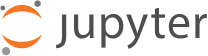

## 8. A little bit more fun
Finally, let's use [spaCy](https://spacy.io/)--another very powerful and full-featured NLP package--to see some of the higher-order analyses that such packages can perform. 

Here, we're going to use our text file to do some Named Entity Recognition (NER).

In [ ]:
### Read the text file
with open('careggio-raw.txt') as f:
    text = f.read()
    
# Import spacy and load the small pipeline
import spacy
nlp = spacy.load('en_core_web_sm')
# Run our text against the model
doc = nlp(text)

# Use the displacy module to display named entities
from spacy import displacy
displacy.render(doc,style='ent')

## 9. Wrap-up
Although these exercises provided only the most preliminary introduction to text preparation for analysis and dissemination, we hope that it gave you a sense of the broad potential for using programmatic approaches to do so. To explore some next steps, refer to the [Learn More](https://jasonbrodeur.github.io/dsi-text-prep/learn-more.html) section of the workshop website. 